# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.


### 1.
- **Profitable Item**
    Any item that provides a financial gain is considered profitable. In other words, if State Bottle Retail – State Bottle Cost > 0, the item is profitable.

    The most profitable item is the one that not only has a high profit margin but also the highest number of bottles sold. Simply having the highest margin isn’t enough, because we also need to take into consideration how many bottles were sold at that margin. An item could have a very high margin per bottle but sell very few units, while another item with a lower margin per bottle might sell in large quantities and generate more total profit.

    To calculate profit for each vendor, we would take the revenue per bottle and multiply it by the number of bottles sold to ensure that we capture the total contribution of each item to the profit.

In [259]:
import pandas as pd
import plotly.express as px
import os
os.chdir(r'C:\Users\karina mehta\UVA class\UnderstandingUncertainity\git_practice\Understanding_Repo\data')

df = pd.read_csv('iowa.csv')

#Adding column with row wise profit
df['Profit'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']

#Grouping thr profit column by item description and summing
Total_Profit = df['Profit'].groupby(df['Item Description']).sum().sort_values(ascending=False)

#Removing item description from index and selecting Top 10 in ascending order
Top_10 = Total_Profit[:10].reset_index().sort_values(by = 'Profit', ascending = True)

#Plotting bar using Plotly for interactivity
Top_10_bar = px.bar(Top_10, x = 'Profit', y= 'Item Description', title = 'Top 10 Items by Profit', orientation = 'h',color_discrete_sequence = ['purple'])
Top_10_bar

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [243]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [129]:
x.reshape(-1,1)-y.reshape(-1,1)

ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 

In [128]:
x.reshape(1,-1)-y.reshape(1,-1)

ValueError: operands could not be broadcast together with shapes (1,3) (1,2) 

In [ ]:
#For Loops for broadcasting

#creating an empty matrix with x as rows and y as columns
result1 = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        result1[i,j] = x[i] - y[j]

print(result1)
#Creating second loop
results2 = np.zeros((len(y),len(x)))

for i in range(len(y)):
    for j in range(len(x)):
        results2[i,j] = x[j] - y[i]

print(results2)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
[[-1.  1.  3.]
 [-4. -2.  0.]]


**how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$**

In the case of x.reshape(1,-1) we are explicitly mention that there must be 1 row. Python automatically calculates the number of elements required for columns: 
                                        column = total elements/total rows => 3/1 => 3
This results in a 3 column vector.

Similarly, x.reshape(-1,1), we are explicitly mentioning that there must be 1 column. Calculations are carried out in the same manner, and a ro vector is generated.


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

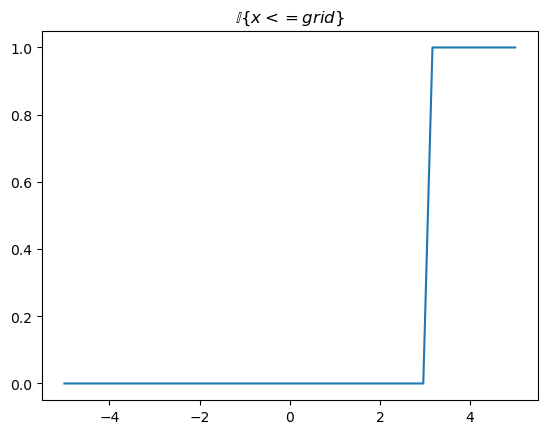

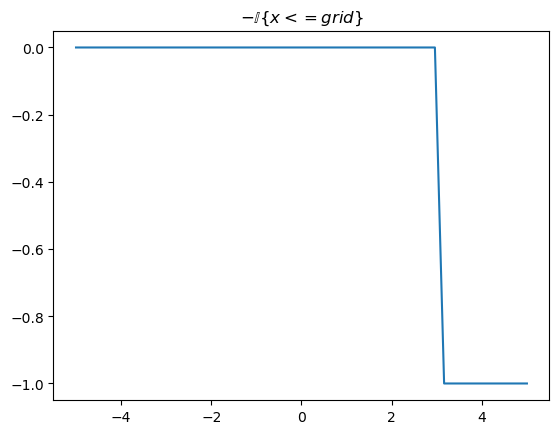

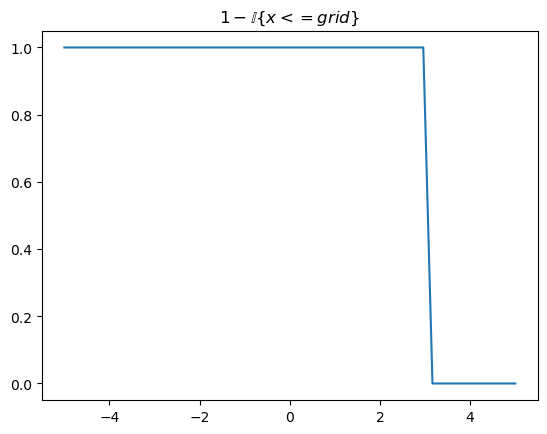

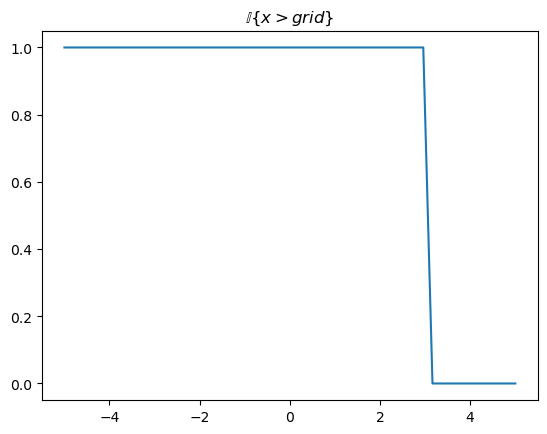

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

grid = np.linspace(-5,5,50)
grid

def ind_ls(x,grid):
    return (x <= grid).astype(int)

def ind_gr(x,grid):
    return (x>grid).astype(int)

sns.lineplot( y = ind_ls(3,grid), x=grid).set(title='$ \\mathbb{I}\\{x <= grid \\}$')
plt.show()

sns.lineplot( y = -ind_ls(3,grid), x=grid).set(title='$ -\\mathbb{I}\\{x <= grid \\}$')
plt.show()

sns.lineplot( y = 1-ind_ls(3,grid), x=grid).set(title='$ 1 - \\mathbb{I}\\{x <= grid \\}$')
plt.show()

sns.lineplot( y = ind_gr(3,grid), x=grid).set(title='$ \\mathbb{I}\\{x > grid \\}$')
plt.show()

'''
This demonstrates how the indicator function can be flipped mathematically by first multiplying by -1 and then adding 1. 
Multiplying by -1 flips the graph upside down, and adding 1 shifts it upward so that the left side becomes 1 (the true case) 
and the right side becomes 0 (the false case, i.e., x>grid). 
We can also visually see how the graph changes at each step, reflecting the effect of these operations
'''

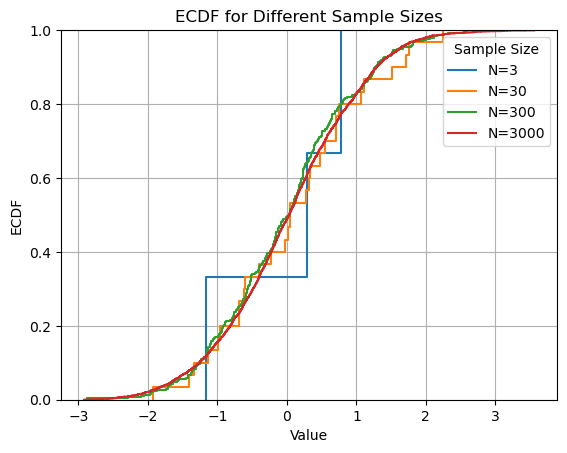

In [256]:
rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(X,label = f'N={N}')

plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('ECDF for Different Sample Sizes')
plt.legend(title = 'Sample Size')
plt.grid(True)

The Empirical Cumulative Distribution Function (ECDF) shows the proportion of data points less than or equal to a given value(z).

More N represent more data points and closer to the truer cumilative distribution frequency.
N= 3, too many jumps doesnt give enough information of the overall distribution, looks more like steps
N = 30, can see a little more of the distribution but still very bumpy
N = 300, still bumpy but smoother than 30 and 3 , closer to a curve
N = 3000, looks like a smooth curve

As N gets bigger, the curve gets smoother and represents a much truer picture of the distribution. It is easier to understand the shape of the distribution.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [269]:
#Calculating the quantile without numpy
import math 

data = [1,2,3,4,5,6,7,8,9]

def quantile_cal(data,q):
    data = sorted(data)
    p_index = 1 + q*(len(data) - 1)

    if p_index <= 1:  
        result = data[0]
    elif p_index >= len(data):
        result = data[-1]
    else:
        l_index = math.floor(p_index) - 1
        u_index = math.ceil(p_index) - 1
        pdiff = p_index - math.floor(p_index)
        result = data[l_index] + pdiff * (data[u_index] - data[l_index])

    return result

#Interquartile function

def interquartile_range(data):
    q1 = quantile_cal(data,0.25)
    q3 = quantile_cal(data,0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return {'iqr':iqr, 'lower_whisker':lower_whisker, 'upper_whisker':upper_whisker}


def five_num_summary(data):
    data = sorted(data)
    min = data[0]
    max = data[-1]
    q1 = quantile_cal(data,0.25)
    q2 = quantile_cal(data,0.5)
    q3 = quantile_cal(data,0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    return {'minimum value':min, 
    'maximum value':max, 
    'q1 (25%)':q1, 
    'q2 (50%)':q2, 
    'q3 (75%)':q3, 
    'interquartile range':iqr,
    'lower_whisker':lower_whisker, 
    'upper_whisker':upper_whisker}


def outlier(data):
    stats = interquartile_range(data)
    lower = stats['lower_whisker']
    upper = stats['upper_whisker']
    
    outliers = []
    return [x < lower or x > upper for x in data]






Describe function for Bottles Sold:  count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64


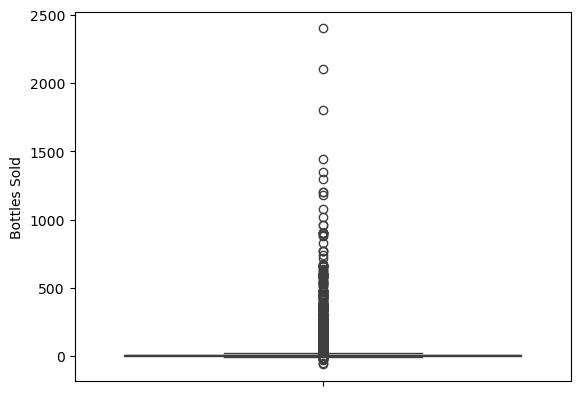

My function for Boxplot Stats: 
minimum value : -60
maximum value : 2400
q1 (25%) : 3.0
q2 (50%) : 6.0
q3 (75%) : 12.0
interquartile range : 9.0
lower_whisker : -10.5
upper_whisker : 25.5
Total number of outliers:  7651


In [ ]:
print('Describe function for Bottles Sold: ',df['Bottles Sold'].describe())
sns.boxplot(df['Bottles Sold'])
plt.show()


print('My function for Boxplot Stats: ')
for key,value in five_num_summary(df['Bottles Sold']).items():
    print(key,':',value)

#Both show a similar value except for the difference in the decimal count

print('Total number of outliers: ',sum(outlier(df['Bottles Sold'])))

#We can see the boxplot represents similar numbers with 2400 being maximum. There are also alot of outliers in this data set. 
#Representeed by the box plot and the total number reflected by my outlier function of 7651

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?